# Dimensionality Reduction techniques	
 - Columns with missing values
 - Filtering columns based on variance
 - Filtering highly correlated columns
 - Random forest
 - Backward elimination
 - Forward features selection
 - Factor analysis
 - Principal component analysis
 - Independent component analysis
 - Isometric mapping
 - t-distributed stochastic neighbor embedding (t-SNE)
 - Uniform Manifold Approximation and Projection (UMAP)
 - Singular value decomposition (SVD)
 - Linear discriminant analysis (LDA)

# Project 1: เทคนิค dimensionality reduction แบบง่าย

In [1]:
import pandas as pd
df = pd.read_csv("loan-eligibility.csv")
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## คอลัมน์ที่มีค่าสูญหาย (Columns with missing values)

In [3]:
# ตรวจสอบ missing values
missing = df.isnull().sum()/len(df)
print(missing)

## รายชื่อคอลัมน์ที่มี missing values > 30%
variables = df.columns[:-1] #ทุกตัวแปร ยกเว้น target variable
variable = []
for i in range(0, len(df.columns[:-1])):
    if missing[i] > 0.03:
        variable.append(variables[i])
print(f'variable: ', variable)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64
variable:  ['Self_Employed', 'LoanAmount', 'Credit_History']


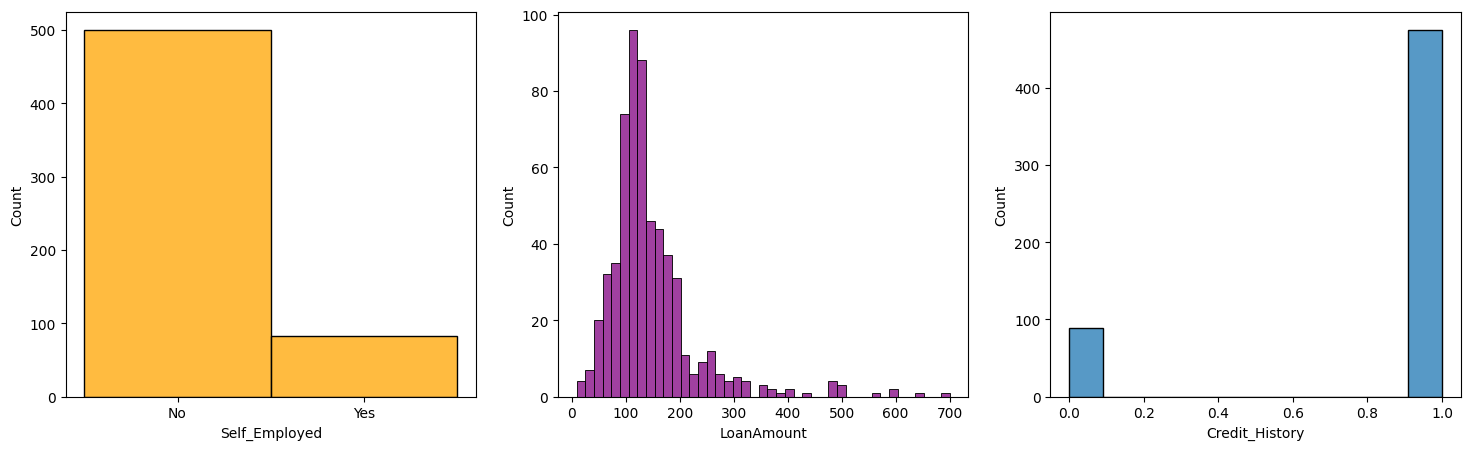

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(ax=axes[0], x=df['Self_Employed'], color='orange')
sns.histplot(ax=axes[1], x=df['LoanAmount'], color='purple')
sns.histplot(ax=axes[2], x=df['Credit_History']);

In [5]:
## แทนค่าสูญหาย
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

## การกรองคอลัมน์ตามความแปรปรวน (Filtering Columns Based on Variance)

In [7]:
# เข้ารหัสคอลัมน์ที่ ไม่เป็นตัวเลข ให้เป็น ตัวเลข

columns=['Gender', 'Married', 'Dependents', 'Education',
         'Self_Employed','Property_Area', 'Loan_Status']

from sklearn.preprocessing import LabelEncoder
for i in columns:
  df[i]= LabelEncoder().fit_transform(df[i])

df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0


In [39]:
X = df[df.columns[1:-1]]
X.var()

Gender               1.778751e-01
Married              2.351972e-01
Dependents           1.255589e+00
Education            1.708902e-01
Self_Employed        1.159035e-01
ApplicantIncome      3.732039e+07
CoapplicantIncome    8.562930e+06
LoanAmount           7.074027e+03
Loan_Amount_Term     4.240668e+03
Credit_History       1.241425e-01
Property_Area        6.201280e-01
dtype: float64

In [16]:
minVar = X.var()
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [68]:
## แสดงรายชื่อคอลัมน์ที่มีความแปรปรวน < 0.15
MinVar = X.var()
ColMinVar = X.columns
variable = []
for i in range(0, len(ColMinVar)):
    if minVar[i] < 0.15:
        variable.append(ColMinVar[i])
print(variable)

['Self_Employed', 'Credit_History']


## การกรองคอลัมน์ที่มีความสัมพันธ์กันสูง (Filtering Highly Correlated Columns)

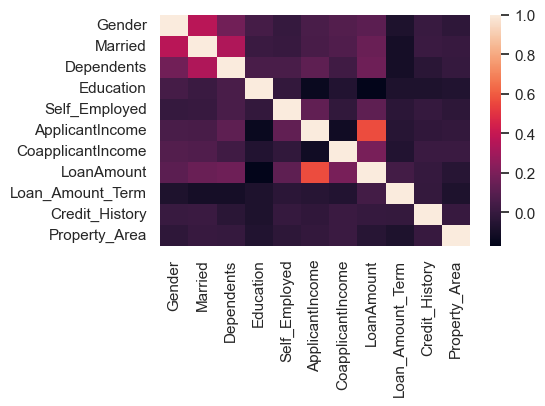

In [195]:
import seaborn as sns
sns.heatmap(X.corr());

In [42]:
import numpy as np
X_corr = X.corr()
indexs = np.tril_indices_from(X_corr)

for i in zip(*indexs):
    X_corr.iloc[i[0], i[1]] = np.NaN

X_corr = (X_corr.stack().to_frame().reset_index()
          .rename(columns={'level_0':'Feature1',
                           'level_1':'Feature2',
                           0:'Correlation'}))
X_corr['absCorrelation']= X_corr.Correlation.abs()
X_corr.tail(3)

,Feature1,Feature2,Correlation,absCorrelation
52,Loan_Amount_Term,Credit_History,0.000445,0.000445
53,Loan_Amount_Term,Property_Area,-0.078748,0.078748
54,Credit_History,Property_Area,0.001963,0.001963


In [45]:
X_corr.columns

Index(['Feature1', 'Feature2', 'Correlation', 'absCorrelation'], dtype='object')

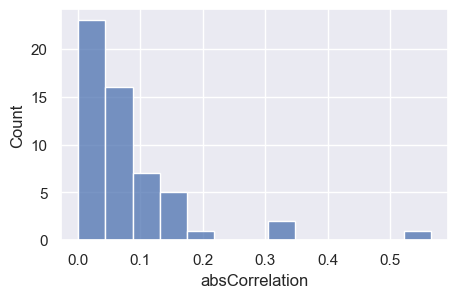

In [58]:
# plot: absCorrelation
sns.set(rc={'figure.figsize':(5,3)})
sns.histplot(X_corr['absCorrelation']);

In [61]:
X_corr.sort_values('Correlation', ascending=False)\
    .query('absCorrelation > 0.5')

,Feature1,Feature2,Correlation,absCorrelation
41,ApplicantIncome,LoanAmount,0.565181,0.565181


# Project 2: เทคนิค dimensionality reduction โดยใช้อัลกอริทึม

In [162]:
import pandas as pd
df = pd.read_csv("loan-eligibility.csv")

# เตรียมข้อมูล (data preparation)
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [2]:
# 1) missing value imputation
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [3]:
# 2) เข้ารหัสคอลัมน์ที่ ไม่เป็นตัวเลข ให้เป็น ตัวเลข

columns=['Gender', 'Married', 'Dependents', 'Education',
         'Self_Employed','Property_Area', 'Loan_Status']

from sklearn.preprocessing import LabelEncoder
for i in columns:
  df[i]= LabelEncoder().fit_transform(df[i])

## Random Forest

In [5]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
X = df[df.columns[1:-1]]
y = df['Loan_Status']
model = RandomForestRegressor(random_state=2024, max_depth=10)
model.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=2024)

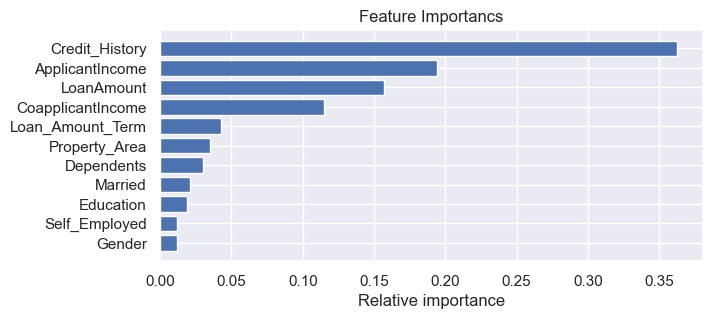

In [106]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances) 

import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))
plt.barh(range(len(indices)), importances[indices])
plt.xlabel('Relative importance')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Feature Importancs');

## Backward Elimination

In [7]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

estimator = LogisticRegression(max_iter=150)
selector = RFE(estimator, n_features_to_select=4, step=1)
selector.fit(X,y)
X_selected = selector.transform(X)
print(f'Support features', selector.support_)
print(f'Features ranking by importance', selector.ranking_)

rank_1=[]
for i in range(0,len(selector.ranking_)):
    if selector.ranking_[i] == 1:
        rank_1.append(i)

print(f'4 most informative features:\n', X.iloc[:,rank_1].columns)

Support features [ True  True False  True False False False False False  True False]
Features ranking by importance [1 1 4 1 3 8 7 5 6 1 2]
4 most informative features:
 Index(['Gender', 'Married', 'Education', 'Credit_History'], dtype='object')


## Forward Features Selection

In [123]:
from sklearn.feature_selection import SelectKBest, f_classif

X_selected = SelectKBest(score_func=f_classif, k=7)
X_selected.fit_transform(X, y)

import numpy as np
scores = -np.log10(X_selected.pvalues_)
ind = np.argpartition(scores, -7)[-7:]
print(f'7 best features are: ', X.iloc[:,ind].columns)

7 best features are:  Index(['Loan_Amount_Term', 'Property_Area', 'LoanAmount', 'Married',
       'CoapplicantIncome', 'Credit_History', 'Education'],
      dtype='object')


## Factor analysis

In [151]:
## pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None, impute='drop',
                    n_factors=X.shape[1])
fa.fit(X)
ev,_ = fa.get_eigenvalues()
print(f'eigenvalues: ', ev)

eigenvalues:  [1.91337588 1.47073174 1.14284986 1.06752104 1.00273222 0.98728155
 0.89135054 0.80558703 0.79404914 0.57757312 0.34694788]


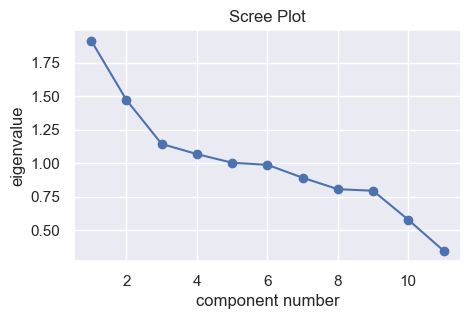

In [152]:
import matplotlib.pyplot as plt
plt.scatter(range(1,X.shape[1]+1), ev)
plt.plot(range(1,X.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('component number')
plt.ylabel('eigenvalue')
plt.show();

## Principal Component Analysis: PCA

In [186]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## create pca_df DataFrame
X_pca = pd.DataFrame(data=X_pca, columns=['PC1','PC2'])
pca_df = X_pca
pca_df['Loan Status'] = y

# pca.explained_variance_ # ค่า explained variance

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, random_state=2024)
X_kpca = kpca.fit_transform(X)

## create kpca_df DataFrame
X_kpca = pd.DataFrame(data=X_kpca, columns=['PC1','PC2'])
kpca_df = X_kpca
kpca_df['Loan Status'] = y

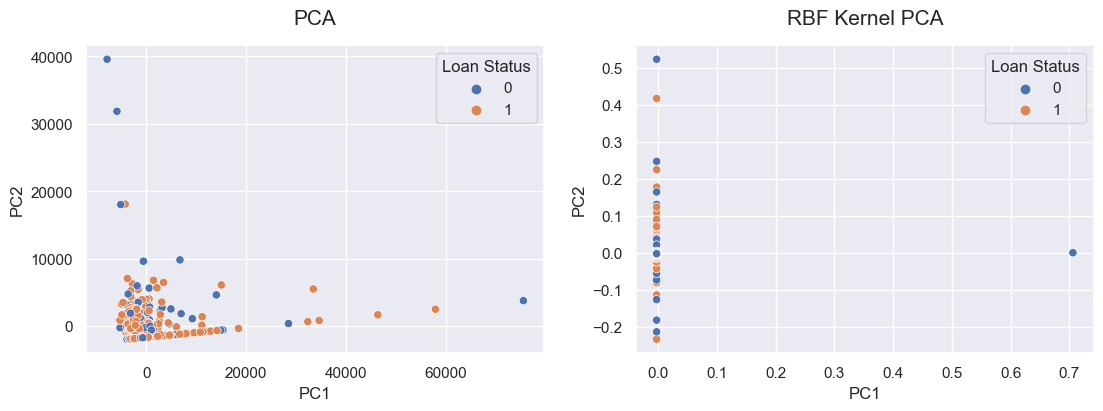

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))
sns.scatterplot(ax=axes[0], x='PC1', y='PC2', hue='Loan Status', data=pca_df)
sns.scatterplot(ax=axes[1], x='PC1', y='PC2', hue='Loan Status', data=kpca_df)
axes[0].set_title("PCA", fontsize=15, pad=15)
axes[1].set_title("RBF Kernel PCA", fontsize=15, pad=15)
plt.show();

# Project 3: เทคนิค dimensionality reduction ที่ใช้กับชุดข้อมูลที่มีคอลัมน์จำนวนมาก

## PCA - Hand Gesture prediction

In [10]:
## (แหล่งที่มา: https://www.kaggle.com/datasets/kyr7plus/emg-4
## หรือ https://github.com/cyber-punk-me/emg-nn/tree/master/data
## หรือ https://github.com/profsarang/ThinkingDataScience/blob/main/Ch02/Dimensionality%20Reduction.ipynb))

# Dataset

import pandas as pd

url0 = "https://raw.githubusercontent.com/prakayrat/DataSciencePython/main/ch2/project2/0.csv"
url1 = "https://raw.githubusercontent.com/prakayrat/DataSciencePython/main/ch2/project2/1.csv"
url2 = "https://raw.githubusercontent.com/prakayrat/DataSciencePython/main/ch2/project2/2.csv"
url3 = "https://raw.githubusercontent.com/prakayrat/DataSciencePython/main/ch2/project2/3.csv"

df0=pd.read_csv(url0, header=None)
df1=pd.read_csv(url1, header=None)
df2=pd.read_csv(url2, header=None)
df3=pd.read_csv(url3, header=None)

df0.shape, df1.shape, df2.shape, df3.shape

((2896, 65), (2892, 65), (2929, 65), (2907, 65))

In [11]:
## ตรวจสอบคอลัมน์
df0.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
      dtype='int64')

In [199]:
## ตรวจสอบ missing values
print('Number of null values in df0: ',df0.isna().sum().sum()),
print('Number of null values in df1: ',df1.isna().sum().sum()),
print('Number of null values in df2: ',df2.isna().sum().sum()),
print('Number of null values in df3: ',df3.isna().sum().sum())

Number of null values in df0:  0
Number of null values in df1:  0
Number of null values in df2:  0
Number of null values in df3:  0


In [12]:
## รวม 4 ไฟล์
allFiles=[url0, url1, url2, url3]

list = []
for file in allFiles:
    read = pd.read_csv(file, header = None)
    list.append(read)
df = pd.concat(list)
df.shape

(11624, 65)

In [13]:
## กำหนด X, y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Split: training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=2023)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X.shape, y.shape)

(9880, 64) (1744, 64) (9880,) (1744,)
(11624, 64) (11624,)


In [14]:
## scaling
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

## Model building

In [15]:
## building model (pip install catboost)

from catboost import Pool, CatBoostClassifier

model = CatBoostClassifier(iterations=300, learning_rate=0.7,
                           random_seed=2023, depth=5)

model.fit(X_train_scaled, y_train,cat_features=None, 
          eval_set=(X_test_scaled, y_test), verbose=False)

In [16]:
prediction=model.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

from sklearn.metrics import accuracy_score
print(f'accuracy: ',accuracy_score(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       441
           1       0.95      0.98      0.97       426
           2       0.95      0.93      0.94       442
           3       0.92      0.92      0.92       435

    accuracy                           0.95      1744
   macro avg       0.95      0.95      0.95      1744
weighted avg       0.95      0.95      0.95      1744

accuracy:  0.9518348623853211


## PCA for 2D visualizations

In [17]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
pca_2 = pca_2.fit(X)
print(pca_2.explained_variance_ratio_, pca_2.explained_variance_ratio_.sum())

pca_2 = pca_2.fit_transform(X)
pca_2_df = pd.DataFrame(pca_2, columns = ['PC1', 'PC2'])
pca_2_df.head(3)

[0.07229639 0.07007213] 0.1423685202135099


,PC1,PC2
0,-46.750769,-56.973255
1,-127.140111,-130.215961
2,-67.020660,-2.647365


In [208]:
# เพิ่มคอลัมน์เป้าหมาย
pca_2_df = pd.concat([pca_2_df, 
                      pd.DataFrame(y, columns=['label'])], axis = 1)
pca_2_df.head(3)

,PC1,PC2,label
0,-46.665481,-56.895379,0
1,-127.176779,-130.226294,0
2,-67.030869,-2.624796,0


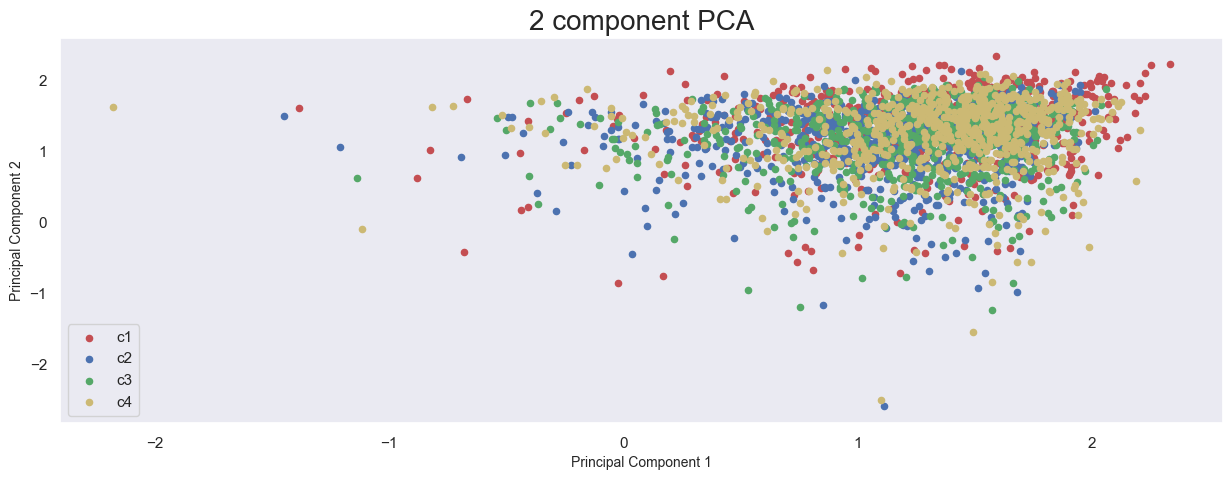

In [217]:
import plotly.express as px
import numpy as np

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(111)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 20)

pca_2_df['label']=pca_2_df['label'].replace(0,'c1').replace(1,'c2')\
                                    .replace(2,'c3').replace(3,'c4')
targets = ['c1', 'c2', 'c3', 'c4']
colors = ['r','b','g','y']

## ในหน่วยลอการิทึม (logarithmic scale)
for target, color in zip(targets,colors):
    indicesToKeep = (pca_2_df['label'] == target)
    ax.scatter(np.log10(pca_2_df.loc[indicesToKeep, 'PC1']),
              np.log10(pca_2_df.loc[indicesToKeep, 'PC2']),
              c = color,
              s = 20)

ax.legend(targets)
ax.grid();

## PCA for 3D visualizations

In [21]:
## PCA for 3D visualizations

pca_3 = PCA(n_components=3)
pca_3_df = pca_3.fit(X)

print(pca_3_df.explained_variance_ratio_, pca_3_df.explained_variance_ratio_.sum())

[0.07229642 0.07007215 0.06055452] 0.20292309261254315


In [22]:
import numpy as np

pca_3 = pca_3.fit_transform(X)
pca_3_df = pd.DataFrame(pca_3, columns = ['PC1', 'PC2', 'PC3'])
pca_3_df = np.log10(pca_3_df)

pca_3_df = pd.concat([pca_3_df, pd.DataFrame(y, columns=['label'])], axis = 1)
pca_3_df['label'] = pca_3_df['label'].replace(0,'c1').replace(1,'c2')\
                                    .replace(2,'c3').replace(3,'c4')

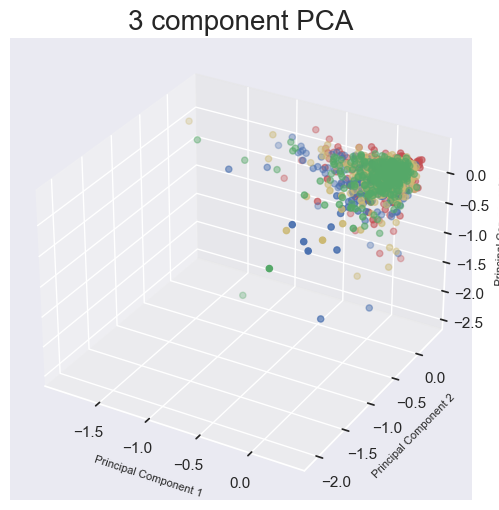

In [226]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 8)
ax.set_ylabel('Principal Component 2', fontsize = 8)
ax.set_zlabel('Principal Component 3', fontsize = 8)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['c1', 'c2', 'c3', 'c4']
colors = ['r','b','g','y']

for target, color in zip(targets,colors):
    indicesToKeep = (pca_3_df['label'] == target)
    ax.scatter(np.log10(pca_3_df.loc[indicesToKeep, 'PC1']),
               np.log10(pca_3_df.loc[indicesToKeep, 'PC2']),
               np.log10(pca_3_df.loc[indicesToKeep, 'PC3']),
               c = color, s = 20)

#ax.legend(targets)
#ax.grid();

## PCA for model buidling

In [229]:
## PCA - from 64 to 30 
from sklearn.decomposition import PCA

pca_30 = PCA(n_components=30)
pca_30 = pca_30.fit(X)
print(pca_30.explained_variance_ratio_.sum())

0.8675621372138682


In [228]:
pca_30 = pca_30.fit_transform(X)
pca_30_df = pd.DataFrame(pca_30)
pca_30_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-46.752169,-56.928579,-29.035208,-14.419447,116.700502,-52.002128,87.056126,7.383253,-70.670697,-32.430034,...,8.329626,-26.509283,41.490452,-20.255340,14.834668,58.861277,-42.458500,60.072698,17.954151,18.496386
1,-127.138166,-130.189676,-14.194138,6.538859,52.450303,-114.977834,11.615116,-73.117067,48.472999,5.470611,...,-7.031009,1.405356,-9.861658,13.287696,-24.327279,-40.024854,-9.830123,-19.075856,-1.840901,-11.611781
2,-67.021467,-2.597618,159.655431,19.338641,-89.931734,-93.090191,-43.854392,65.669224,158.717926,-17.800798,...,-8.460751,-9.397514,46.523193,-31.248558,4.417834,14.147344,-31.908947,18.586713,17.430191,18.809436


In [230]:
## DataFrame
pca_30_df = pd.concat([pca_30_df, pd.DataFrame(y, columns=['label'])], axis = 1)
print(pca_30_df.shape)

(11624, 31)


In [231]:
## Split data set
from sklearn.model_selection import train_test_split

X_train, X_val, label_train, label_val = train_test_split(pca_30_df.iloc[:,:-1],
                                                          pca_30_df.iloc[:,-1],
                                                          test_size=0.15,
                                                          random_state=2024)
X_train.shape, label_train.shape, X_val.shape, label_val.shape

((9880, 30), (9880,), (1744, 30), (1744,))

In [232]:
## scaling
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_train_scaled = s.fit_transform(X_train)
X_val_scaled = s.transform(X_val)

In [233]:
## Model building
from catboost import Pool, CatBoostClassifier

model_pca_30 = CatBoostClassifier(iterations=300, learning_rate=0.7,
                                  random_seed=2023, depth=5)

model_pca_30.fit(X_train_scaled, label_train,
                 cat_features=None,
                 eval_set=(X_val_scaled, label_val),
                 verbose=False)

In [234]:
prediction_pca = model_pca_30.predict(X_val_scaled)
model_pca_30.score(X_val_scaled, label_val)

0.805045871559633

In [237]:
from sklearn.metrics import classification_report
print(classification_report(label_val, prediction_pca))

from sklearn.metrics import accuracy_score
print(f'accuracy: ',accuracy_score(label_val, prediction_pca))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       441
           1       0.75      0.86      0.80       426
           2       0.77      0.71      0.74       442
           3       0.74      0.74      0.74       435

    accuracy                           0.81      1744
   macro avg       0.81      0.81      0.81      1744
weighted avg       0.81      0.81      0.81      1744

accuracy:  0.805045871559633


## components = 5, 10, 20, 30, 40, 50, 60

In [238]:
pca_list = []

for n in [5, 10, 20, 30, 40, 50, 60]:
  PCAmod = PCA(n_components=n)
  PCAmod.fit(X)
  pca_list.append(PCAmod.explained_variance_ratio_.sum())

pd.DataFrame(pca_list, index=[[5, 10, 20, 30, 40, 50, 60]],
             columns=['Explained variance'])

,Explained variance
5,0.310524
10,0.517862
20,0.746290
30,0.867511
40,0.942273
50,0.982689
60,0.998240


In [240]:
accuracies = []
for n in [5, 10, 20, 30, 40, 50, 60]:
  PCAmod = PCA(n_components=n)
  PCAmod = PCAmod.fit_transform(X)
  PCAmod = pd.DataFrame(PCAmod)
  df_pca = pd.concat([PCAmod, pd.DataFrame(y, columns=['label'])], axis = 1)
  X_train, X_val, label_train, label_val = train_test_split(df_pca.iloc[:,:-1],
                                                            df_pca.iloc[:,-1],
                                                            test_size=0.15,
                                                            random_state=2023)
  X_train_scaled = s.fit_transform(X_train)
  X_val_scaled = s.transform(X_val)
    
  model_pca = CatBoostClassifier(iterations=300, learning_rate=0.7,
                                 random_seed=2023, depth=5)
  model_pca.fit(X_train_scaled, label_train, cat_features=None,
                eval_set=(X_val_scaled, label_val), verbose=False)

  accuracies.append(model_pca.score(X_val_scaled,label_val))

In [241]:
pd.DataFrame(accuracies, index=[[5, 10, 20, 30, 40, 50, 60]], 
             columns=['accuracy'])

,accuracy
5,0.407110
10,0.582569
20,0.702408
30,0.811353
40,0.872133
50,0.901950
60,0.919725


# Project 4: เทคนิค dimensionality reduction อื่นๆ

# Independent component analysis (ICA)

In [53]:
import pandas as pd
df = pd.read_csv("loan-eligibility.csv")

# 1) missing value imputation
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# 2) เข้ารหัสคอลัมน์ที่ ไม่เป็นตัวเลข ให้เป็น ตัวเลข

columns=['Gender', 'Married', 'Dependents', 'Education',
         'Self_Employed','Property_Area', 'Loan_Status']

from sklearn.preprocessing import LabelEncoder
for i in columns:
  df[i]= LabelEncoder().fit_transform(df[i])

# X, y
X = df[df.columns[1:-1]]
y = df['Loan_Status']

## Independent Component Analysis (ICA) 

In [264]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=2,
              max_iter=500, random_state=2024)
fast_ica = ica.fit_transform(X)

import numpy as np
fast_ica_df = pd.DataFrame(fast_ica, columns=['component1','component2'])
fast_ica_df.head(3)

,component1,component2
0,-0.045500,-0.552712
1,0.136991,-0.048050
2,0.423446,-0.584293


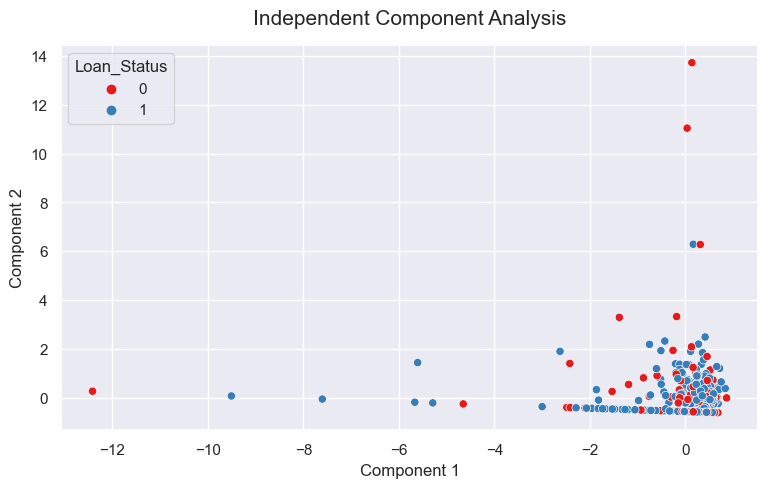

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,5))
sns.scatterplot(x='component1', y='component2', data=fast_ica_df,
                hue=y, palette='Set1')
plt.title("Independent Component Analysis", fontsize=15, pad=15)
plt.xlabel("Component 1", fontsize=12)
plt.ylabel("Component 2", fontsize=12)
plt.show();

## Isometric Mapping

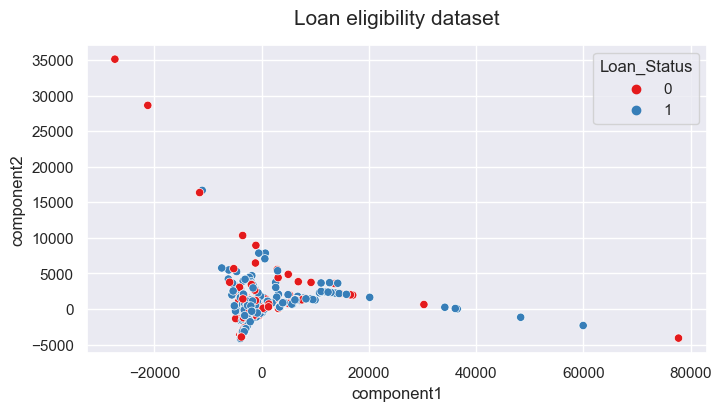

In [275]:
from sklearn.manifold import Isomap

isomap = Isomap(n_neighbors=5, n_components=2, eigen_solver='auto')
X_isomap = isomap.fit_transform(X)
X_isomap_df = pd.DataFrame(X_isomap, columns=['component1','component2'])

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.scatterplot(x='component1', y='component2', data=X_isomap_df,
                hue=y, palette='Set1')
plt.title("Loan eligibility dataset", fontsize=15, pad=15);

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

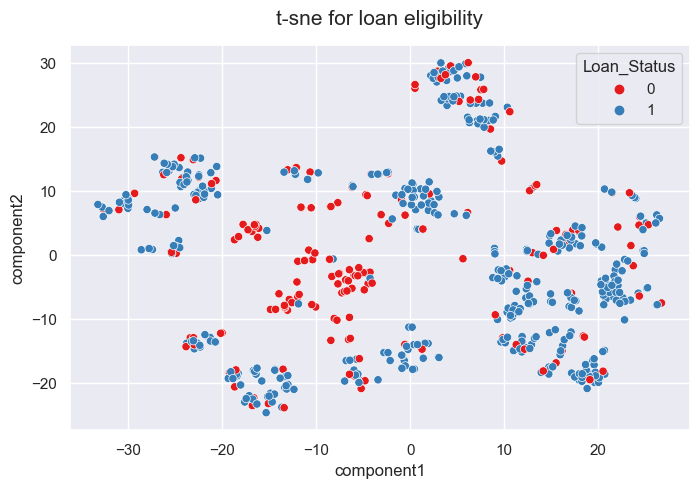

In [278]:
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

sc = StandardScaler()
pca = PCA()
tsne = TSNE()

tsne_after_pca = Pipeline([('std_scaler:', sc),('pca:', pca),('tsne:', tsne)])
X_tsne = tsne_after_pca.fit_transform(X)
X_tsne_df = pd.DataFrame(X_tsne, columns=['component1','component2'])

plt.figure(figsize=(8,5))
sns.scatterplot(x='component1', y='component2', data=X_tsne_df,
                hue=y, palette='Set1')
plt.title("t-sne for loan eligibility", fontsize=15, pad=15)
plt.xlabel("component1")
plt.ylabel("component2");

# UMAP (Uniform Manifold Approximation and Projection) 

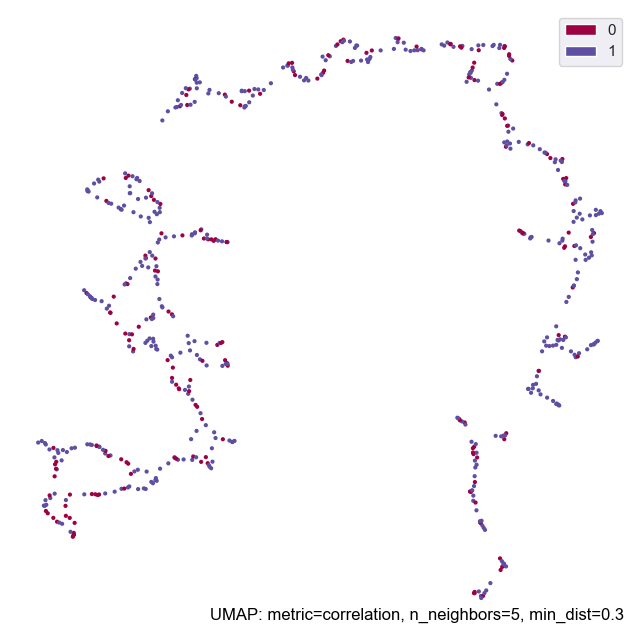

In [280]:
# pip install umap-learn
# pip install umap-learn[plot]
# pip install ipywidgets

import umap
import umap.plot
mapper = umap.UMAP(n_neighbors=5, min_dist=0.3,
                  metric='correlation').fit(X)
umap.plot.points(mapper, labels=y);

## Singular Value Decomposition (SVD)

In [54]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [55]:
def get_models():
    models = dict()
    for i in range(1, 11):
        steps = [('svd', TruncatedSVD(n_components=i)),
                ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

In [56]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10,
                                 n_repeats=3, random_state=2024)
    scores = cross_val_score(model, X, y,
                            scoring='accuracy', cv=cv, n_jobs=-1,
                            error_score='raise')
    return scores

In [57]:
models = get_models()
results, names = [], []
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('%s) mean=%.3f std=(%.3f)' % (name, mean(scores), std(scores)))

1) mean=0.687 std=(0.005)
2) mean=0.689 std=(0.010)
3) mean=0.684 std=(0.011)
4) mean=0.685 std=(0.012)
5) mean=0.685 std=(0.012)
6) mean=0.686 std=(0.010)
7) mean=0.683 std=(0.016)
8) mean=0.680 std=(0.029)
9) mean=0.801 std=(0.040)
10) mean=0.804 std=(0.037)


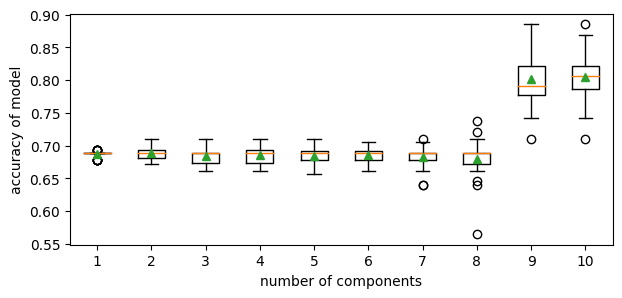

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,3))
plt.boxplot(results, labels=names, showmeans=True)
plt.xlabel('number of components')
plt.ylabel('accuracy of model')
plt.show();

## Linear Discriminant Analysis (LDA)

In [88]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.5,
                                                    stratify=y,
                                                    random_state=2024)
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [87]:
n_classes = len(np.unique(y))
n_classes

10

In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracies=[]
auc=[]
for comps in range(2,n_classes):
    lda = LinearDiscriminantAnalysis(n_components=comps)
    lda.fit(X_train, y_train)
    classifier = RandomForestClassifier(random_state=2024, max_depth=10)
    classifier.fit(lda.transform(X_train), y_train)
    y_pred = classifier.predict(lda.transform(X_test))
    accuracies.append(metrics.accuracy_score(y_test,y_pred))
    print(comps,f'components: accuracy =',metrics.accuracy_score(y_test,y_pred))

2 components: accuracy = 0.6629588431590656
3 components: accuracy = 0.8286985539488321
4 components: accuracy = 0.8665183537263627
5 components: accuracy = 0.8932146829810901
6 components: accuracy = 0.9043381535038932
7 components: accuracy = 0.9221357063403782
8 components: accuracy = 0.92880978865406
9 components: accuracy = 0.9365962180200222


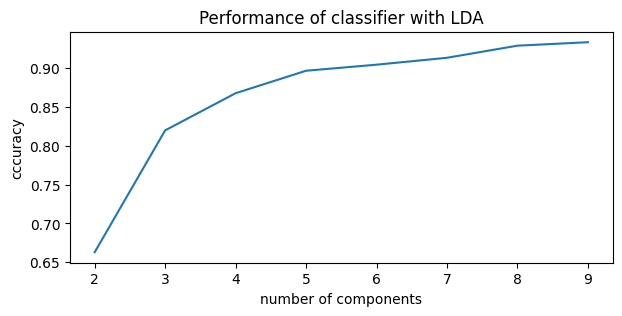

In [89]:
plt.figure(figsize=(7,3))
plt.plot(range(2,10), accuracies)
plt.xlabel('number of components')
plt.ylabel('cccuracy')
plt.title('Performance of classifier with LDA');

In [97]:
classifier = RandomForestClassifier(random_state=1, max_depth=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy of classifier taking all features of dataset: ',
      metrics.accuracy_score(y_test,y_pred))

Accuracy of classifier taking all features of dataset:  0.9610678531701891
